# Fuel Cost Analysis

In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np
from scipy.stats import linregress

### Cleaning Data

In [2]:
#Import file
fuel_cost = pd.read_csv('Resources/database.csv', low_memory=False)
fuel_cost.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [3]:
fuel_cost.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

In [4]:
#Extract columns
cleaned_data = fuel_cost[['Year', 'Annual Fuel Cost (FT1)']]
cleaned_data

,Year,Annual Fuel Cost (FT1)
0,1984,1750
1,1984,1750
2,1984,1650
3,1984,1650
4,1984,2050
...,...,...
38108,2017,1350
38109,2017,1900
38110,2017,1850
38111,2017,1700


### 1. Anaysis of fuel cost & MPG from 1984 - 2017 

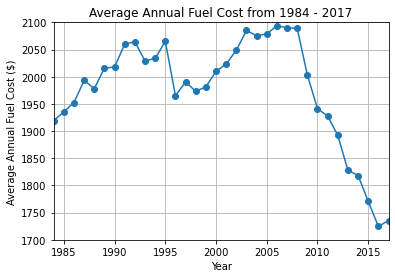

In [5]:
# year = fuel_cost.loc[fuel_cost['Year']]
#year_df = cleaned_data.groupby('Year').unique()
years = [1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
# year = year_df['Year']
# print(len(year))
# print(year)
cost = fuel_cost.groupby('Year').mean()['Annual Fuel Cost (FT1)']
# print(len(cost))
# print(cost)
# print(cost.min())

# plt.figure(figsize=(12,8), dpi= 100, facecolor="w", edgecolor="k")
plt.plot(years, cost, marker='o')
# plt.xticks(nparrage)
plt.xlim(1984,2017)
plt.ylim(1700,2100)
plt.grid('True')
#plt.tick_params
#Figure out how to add more values along x axis label 

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost ($)")
plt.title("Average Annual Fuel Cost from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average Annual Fuel Cost from 1984 - 2017.png")

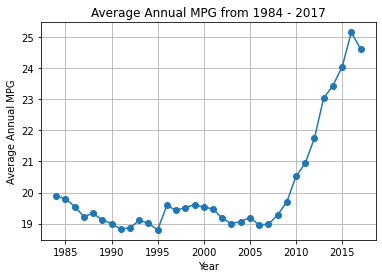

In [6]:
#Define new MPG variable
mpg = fuel_cost.groupby('Year').mean()['Combined MPG (FT1)']

#Plot MPG over time
# plt.figure(figsize=(12,8), dpi= 100, facecolor="w", edgecolor="k")
plt.plot(years, mpg, marker='o')
# plt.xlim(1984,2017)
# plt.ylim(1700,2100)
plt.grid('True')
#Figure out how to add more values along x axis label 

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average Annual MPG from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average Annual MPG from 1984 - 2017.png")

### 2. Comparison of standard vs. performance vehicle 

In [8]:
fuel_cost['Make'].unique()
#Porsche
#Toyota

array(['Alfa Romeo', 'AM General', 'American Motors Corporation',
       'Aston Martin', 'Audi', 'Avanti Motor Corporation', 'Bertone',
       'Bill Dovell Motor Car Company', 'Bitter Gmbh and Co. Kg', 'BMW',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford',
       'GMC', 'Grumman Olson', 'Honda', 'Import Foreign Auto Sales Inc',
       'Isuzu', 'Jaguar', 'Jeep', 'Kenyon Corporation Of America',
       'Lamborghini', 'Lincoln', 'Lotus', 'Maserati', 'Mazda',
       'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile',
       'Peugeot', 'Pininfarina', 'Plymouth', 'Pontiac', 'Porsche',
       'Renault', 'Rolls-Royce', 'S and S Coach Company  E.p. Dutton',
       'Saab', 'Subaru', 'Superior Coaches Div E.p. Dutton', 'Suzuki',
       'Toyota', 'Volkswagen', 'Volvo', 'E. P. Dutton, Inc.', 'Ferrari',
       'Merkur', 'TVR Engineering Ltd', 'Acura', 'Autokraft Limited',
       'Hyundai', 'Lambda Control Systems', 'London Coach Co Inc',
       'Panther Car Compan

In [9]:
#Extract porsche and toyota data
p_data = fuel_cost.loc[fuel_cost['Make'] == 'Porsche']
t_data = fuel_cost.loc[fuel_cost['Make'] == 'Toyota']

#Create graph for porsche MPG
por_fcost = p_data.groupby('Year').mean()['Annual Fuel Cost (FT1)']
por_fcost
#Create graphy for Toyota MPG
toy_fcost = t_data.groupby('Year').mean()['Annual Fuel Cost (FT1)']
toy_fcost


por_mpg = p_data.groupby('Year').mean()['Combined MPG (FT1)']
por_mpg

toy_mpg = t_data.groupby('Year').mean()['Combined MPG (FT1)']
toy_mpg
#Stack the graphs


Year
1984    24.051948
1985    23.590164
1986    21.789474
1987    21.875000
1988    21.422535
1989    20.969697
1990    20.620690
1991    20.155172
1992    19.948276
1993    19.118644
1994    20.081633
1995    20.596774
1996    21.236364
1997    20.907407
1998    20.890909
1999    21.740000
2000    21.563636
2001    21.943396
2002    22.117647
2003    22.275862
2004    21.375000
2005    21.981132
2006    21.234043
2007    21.440000
2008    21.142857
2009    21.192982
2010    21.561404
2011    21.474576
2012    24.203390
2013    24.796610
2014    25.482759
2015    25.150943
2016    25.760000
2017    26.372881
Name: Combined MPG (FT1), dtype: float64

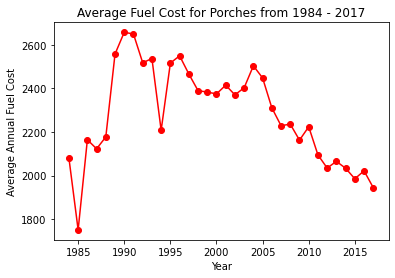

In [44]:
plt.plot(years, por_fcost, marker='o', color='Red')

# Label
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost")
plt.title("Average Fuel Cost for Porches from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average Fuel Cost for Porches.png")

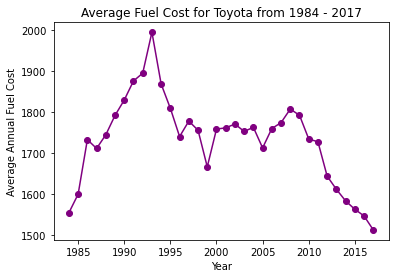

In [45]:
plt.plot(years, toy_fcost, marker='o', color='Purple')

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost")
plt.title("Average Fuel Cost for Toyota from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average Fuel Cost for Toyota.png")

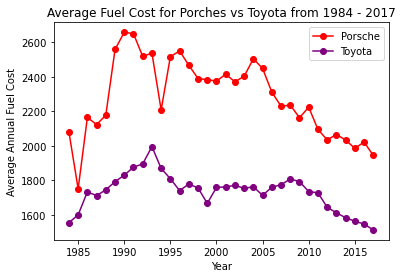

In [51]:
por_plot, = plt.plot(years, por_fcost, marker='o', color='Red', label="Porsche")
toy_plot, = plt.plot(years, toy_fcost, marker='o', color='Purple', label="Toyota")

# Legend
plt.legend(handles=[por_plot, toy_plot], loc="best")


# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost")
plt.title("Average Fuel Cost for Porches vs Toyota from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average Fuel Cost for Porches VS Toyota.png")

plt.show()

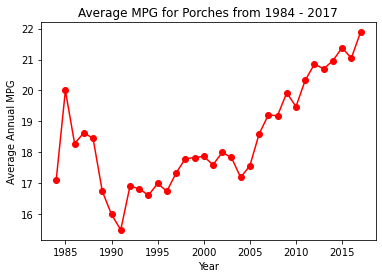

In [47]:
plt.plot(years, por_mpg, marker='o', color='Red')

# Label
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average MPG for Porches from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average MPG for Porches.png")

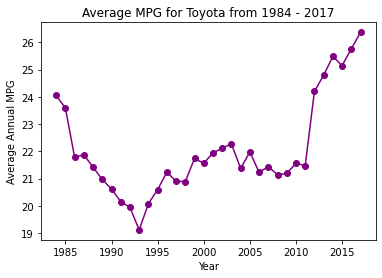

In [48]:
plt.plot(years, toy_mpg, marker='o', color='Purple')

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average MPG for Toyota from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average MPG for Toyota.png")

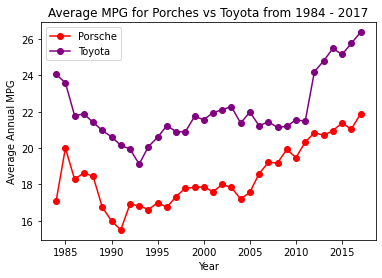

In [50]:
plt.plot(years, por_mpg, marker='o', color='Red')
plt.plot(years, toy_mpg, marker='o', color='Purple')

# Legend
plt.legend(handles=[por_plot, toy_plot], loc="best")


# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average MPG for Porches vs Toyota from 1984 - 2017")

plt.savefig("../Fuel-Cost-Analysis/Analysis/Average MPG for Porches VS Toyota.png")

plt.show()

### 3. Comparison of automatic vs. manual cars 

In [16]:
cleaned_data2 = fuel_cost.loc[fuel_cost['Year'] == 2017]
cleaned_data2

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
36885,37378,2017,Acura,ILX,Compact Cars,Front-Wheel Drive,Auto(AM-S8),NaN,4,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36886,37593,2017,Acura,MDX AWD,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S9),NaN,22,SIDI; Stop-Start,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36887,37594,2017,Acura,MDX AWD,Small Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S9),NaN,23,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36888,37591,2017,Acura,MDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S9),NaN,20,SIDI; Stop-Start,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
36889,37592,2017,Acura,MDX FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S9),NaN,21,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,14,13.84,13.3


In [17]:
fuel_cost2017 = cleaned_data2['Annual Fuel Cost (FT1)']
fuel_cost2017

36885    1450
36886    1900
36887    2000
36888    1850
36889    1900
         ... 
38108    1350
38109    1900
38110    1850
38111    1700
38112    1750
Name: Annual Fuel Cost (FT1), Length: 1228, dtype: int64

In [18]:
transmit_2017 = cleaned_data2.replace({'Auto(AM-S8)' : 'Automatic', 
                                        'Automatic (S9)' : 'Automatic', 
                                        'Auto(AM-S9)' : 'Automatic',
                                        'Automatic (S6)': 'Automatic', 
                                        'Auto(AM-S7)' : 'Automatic', 
                                        'Auto(AM6)' : 'Automatic', 
                                        'Automatic 8-Speed': 'Automatic', 
                                        'Automatic (S8)' : 'Automatic', 
                                        'Auto(AM7)' : 'Automatic', 
                                        'Manual(M7)' : 'Manual', 
                                        'Auto(AM-S6)': 'Automatic', 
                                        'Manual 6-Speed' : 'Manual', 
                                        'Automatic (A1)' :'Automatic', 
                                        'Automatic 6-Speed' : 'Automatic', 
                                        'Automatic (S10)' : 'Automatic', 
                                        'Automatic (variable gear ratios)' : 'Automatic', 
                                        'Manual 7-Speed' : 'Manual', 
                                        'Automatic 9-Speed' : 'Automatic', 
                                        'Manual 5-Speed' : 'Manual', 
                                        'Automatic 4-Speed' : 'Automatic',
                                        'Auto(AV-S7)' : 'Automatic', 
                                        'Automatic (S7)' : 'Automatic', 
                                        'Automatic 5-Speed' : 'Automatic', 
                                        'Auto(AV-S6)' : 'Automatic', 
                                        'Auto(AV-S8)' : 'Automatic', 
                                        'Automatic 7-Speed' : 'Automatic', 
                                        'Auto(AM8)' : 'Automatic',
                                        'Automatic (S5)' : 'Automatic'})

transmit_2017_a = transmit_2017.loc[transmit_2017['Transmission'] == 'Automatic']
transmit_2017_auto = transmit_2017_a['Transmission']
transmit_2017_a_fuel = transmit_2017_a['Annual Fuel Cost (FT1)']
transmit_2017_a_ID = transmit_2017_a['Vehicle ID']
# print(len(transmit_2017_a))
# print(transmit_2017_auto)
# print(transmit_2017_a_fuel)

transmit_2017_m = transmit_2017.loc[transmit_2017['Transmission'] == 'Manual']
transmit_2017_manual = transmit_2017_m['Transmission']
transmit_2017_m_fuel = transmit_2017_m['Annual Fuel Cost (FT1)']
transmit_2017_m_ID = transmit_2017_m['Vehicle ID']
# print(len(transmit_2017_m))

# transmit_2017_comps = pd.DataFrame({"Automatic Fuel Cost" : transmit_2017_a_fuel,
#                                   "Manual Fuel Cost" : transmit_2017_m_fuel})
# transmit_2017_comps

Average fuel cost is $1753.01 dollars for Automatic Drive


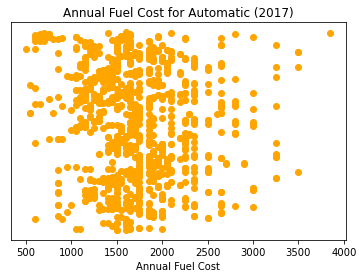

In [19]:
plt.scatter(transmit_2017_a_fuel, transmit_2017_a_ID, color="orange")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for Automatic (2017)")

av_auto = transmit_2017_a['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_auto, 2)} dollars for Automatic Drive')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for Automatic.png")

Average fuel cost is $1634.97 dollars for Manual Drive


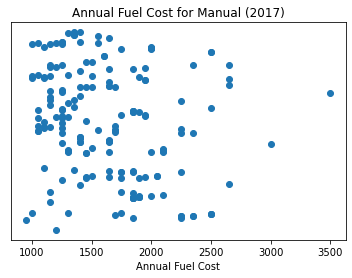

In [34]:
plt.scatter(transmit_2017_m_fuel, transmit_2017_m_ID)

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for Manual (2017)")

av_manual = transmit_2017_m['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_manual, 2)} dollars for Manual Drive')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for Manual.png")

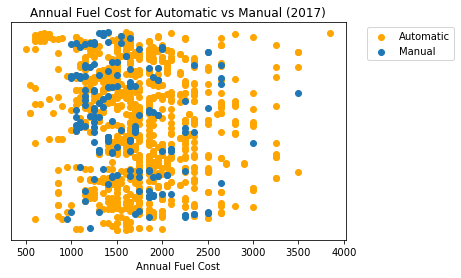

In [35]:
auto_plot = plt.scatter(transmit_2017_a_fuel, transmit_2017_a_ID, color="orange", label="Automatic")
man_plot = plt.scatter(transmit_2017_m_fuel, transmit_2017_m_ID, label="Manual")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for Automatic vs Manual (2017)")
plt.legend(handles=[auto_plot, man_plot], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for Automatic vs Manual.png", bbox_inches='tight')

### 4. Comparison of front, all, and rear wheel drive

In [22]:
drive_2017 = cleaned_data2['Drive']
drive_2017.unique()

array(['Front-Wheel Drive', 'All-Wheel Drive', 'Rear-Wheel Drive',
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [23]:
drive_2017 = cleaned_data2.replace({'4-Wheel Drive' : 'All-Wheel Drive', 
                                 'Part-time 4-Wheel Drive': 'All-Wheel Drive'})
drive_2017

front = drive_2017.loc[drive_2017['Drive'] == 'Front-Wheel Drive']
all_wh = drive_2017.loc[drive_2017['Drive'] == 'All-Wheel Drive']
rear = drive_2017.loc[drive_2017['Drive'] == 'Rear-Wheel Drive']

Average fuel cost is $1317.1 dollars for Front Wheel Drive


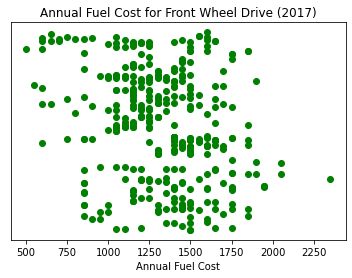

In [36]:
#Front wheel drive
f_fuel_cost = front['Annual Fuel Cost (FT1)']
f_v_id =  front['Vehicle ID']
plt.scatter(f_fuel_cost, f_v_id, color="green")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for Front Wheel Drive (2017)")

av_front = front['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_front, 2)} dollars for Front Wheel Drive')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for Front Wheel Drive.png")

Average fuel cost is $1866.7 dollars for All Wheel Drive


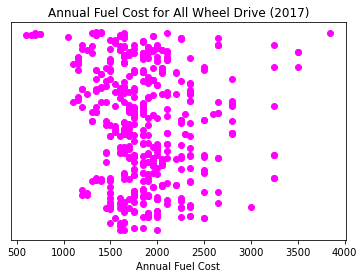

In [37]:
#All wheel drive
a_fuel_cost = all_wh['Annual Fuel Cost (FT1)']
a_v_id =  all_wh['Vehicle ID']

plt.scatter(a_fuel_cost, a_v_id, color="magenta")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for All Wheel Drive (2017)")

av_all_wh = all_wh['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_all_wh, 2)} dollars for All Wheel Drive')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for All Wheel Drive.png")

Average fuel cost is $2015.64 dollars for Rear Wheel Drive


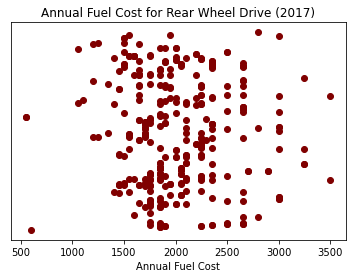

In [38]:
#Rear wheel drive
r_fuel_cost = rear['Annual Fuel Cost (FT1)']
r_v_id =  rear['Vehicle ID']

plt.scatter(r_fuel_cost, r_v_id, color="maroon")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for Rear Wheel Drive (2017)")

av_rear = rear['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_rear, 2)} dollars for Rear Wheel Drive')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for Rear Wheel Drive.png")

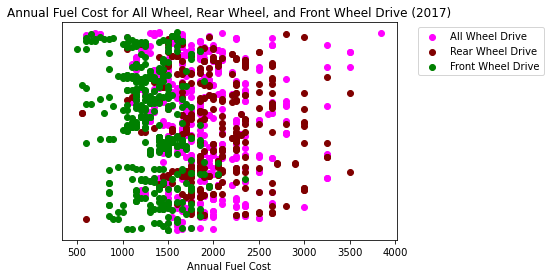

In [39]:
#Combined all data for comparison
all_plot = plt.scatter(a_fuel_cost, a_v_id, color="magenta", label="All Wheel Drive")
rear_plot = plt.scatter(r_fuel_cost, r_v_id, color="maroon", label="Rear Wheel Drive")
front_plot = plt.scatter(f_fuel_cost, f_v_id, color="green", label="Front Wheel Drive")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for All Wheel, Rear Wheel, and Front Wheel Drive (2017)")
plt.legend(handles=[all_plot, rear_plot, front_plot], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for All Wheel, Rear Wheel, and Front Wheel Drive.png", bbox_inches='tight')

### 5. Comparison of premium, midgrade, and regular fuel types

In [28]:
fuel_type2017 = cleaned_data2['Fuel Type 1']
fuel_type2017.unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Electricity',
       'Midgrade Gasoline'], dtype=object)

In [29]:
#Fuel Types

premium = cleaned_data2.loc[cleaned_data2['Fuel Type 1'] == 'Premium Gasoline']
midgrade = cleaned_data2.loc[cleaned_data2['Fuel Type 1'] == 'Midgrade Gasoline']
regular = cleaned_data2.loc[cleaned_data2['Fuel Type 1'] == 'Regular Gasoline']

print(f'There are {len(premium)} data points for premium fuel type')
print(f'There are {len(midgrade)} data points for midgrade fuel type')
print(f'There are {len(regular)} data points for regular fuel type')

There are 557 data points for premium fuel type
There are 13 data points for midgrade fuel type
There are 624 data points for regular fuel type


Average fuel cost is $2027.56 dollars Premium Gasoline


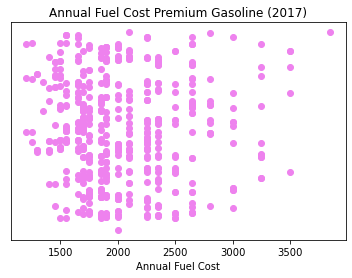

In [40]:
#Premium fuel type

prem_fuel_cost = premium['Annual Fuel Cost (FT1)']
prem_id = premium['Vehicle ID']

plt.scatter(prem_fuel_cost, prem_id, color='violet')

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost Premium Gasoline (2017)")

av_premium = premium['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_premium, 2)} dollars Premium Gasoline')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost Premium Gasoline.png")

Average fuel cost is $2096.15 dollars for Midgrade Gasoline


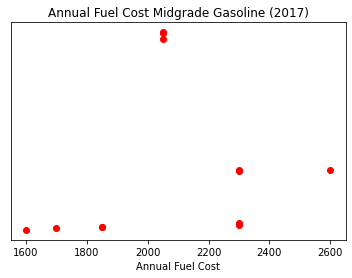

In [41]:
# Midgrade fuel type

mid_fuel_cost = midgrade['Annual Fuel Cost (FT1)']
mid_id = midgrade['Vehicle ID']

plt.scatter(mid_fuel_cost, mid_id, color='red')

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost Midgrade Gasoline (2017)")

av_midgrade = midgrade['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_midgrade, 2)} dollars for Midgrade Gasoline')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost Midgrade Gasoline.png")

Average fuel cost is $1509.46 dollars for Regular Gasoline


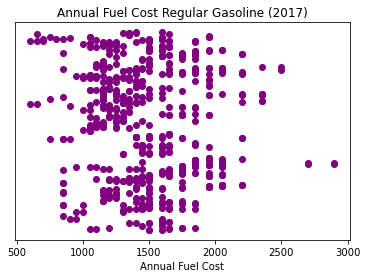

In [42]:
# Regular fuel type

reg_fuel_cost = regular['Annual Fuel Cost (FT1)']
reg_id = regular['Vehicle ID']

plt.scatter( reg_fuel_cost, reg_id, color='purple')

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost Regular Gasoline (2017)")

av_regular = regular['Annual Fuel Cost (FT1)'].mean()
print(f'Average fuel cost is ${round(av_regular, 2)} dollars for Regular Gasoline')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost Regular Gasoline.png")

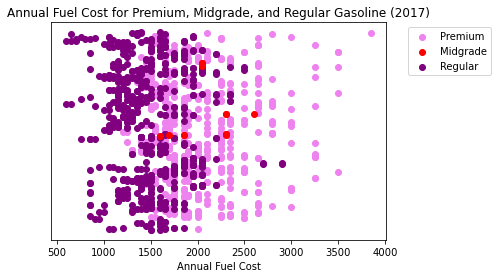

In [43]:
#Compare fuel types 
prem_plot = plt.scatter(prem_fuel_cost, prem_id, color='violet', label="Premium")
reg_plot = plt.scatter(reg_fuel_cost, reg_id, color='purple', label="Regular")
mid_plot = plt.scatter(mid_fuel_cost, mid_id, color='red', label="Midgrade")

# Make y axis disappear #magic
ax = plt.gca()
ax.axes.yaxis.set_visible(False)

# Labels
plt.xlabel("Annual Fuel Cost")
plt.title("Annual Fuel Cost for Premium, Midgrade, and Regular Gasoline (2017)")
plt.legend(handles=[prem_plot, mid_plot, reg_plot], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("../Fuel-Cost-Analysis/Analysis/Annual Fuel Cost for Premium, Midgrade, and Regular Gasoline.png", bbox_inches='tight')